#PREDICTING THE SALES


#Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Importing the dataset

In [ ]:
data = pd.read_csv("/content/Advertising_dataset.txt")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


#Checking for missing values in dataset

In [ ]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

#Initiating the variables

In [ ]:
X = data.drop(['sales'], axis = 1)
y = data['sales'].values.reshape(-1,1)

In [ ]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,1402.250000
std,85.854236,14.846809,21.778621,521.745657
min,0.700000,0.000000,0.300000,160.000000
25%,74.375000,9.975000,12.750000,1037.500000
50%,149.750000,22.900000,25.750000,1290.000000
75%,218.825000,36.525000,45.100000,1740.000000
max,296.400000,49.600000,114.000000,2700.000000


#Correlation

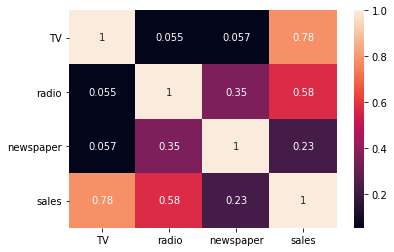

In [ ]:
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()


#Splitting data into training, testing datase

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Fitting Linear regression to our training set

In [ ]:
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Testing

In [ ]:
y_pred = multiple_reg.predict(X_test)

#Calculating the coefficients

In [ ]:
multiple_reg.coef_

array([[ 4.47295175, 18.91950542,  0.27611143]])

#Calculating the intercept

In [ ]:
multiple_reg.intercept_

array([297.90673381])

#Calculating the R squared value

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.899438024100912

#Prediction for new values

In [ ]:
#Taking the input from the user
print("Enter the ammount you will invest on:")
tv = float(input("TV : "))
radio = float(input("Radio : "))
newspaper = float(input("Newspaper : "))

#predicting the sales with respect to the inputs
output = multiple_reg.predict([[tv,radio,newspaper]])
print("you will get Rs{:.2f} sales by advertising Rs{} on TV, Rs{} on Radio and Rs{} on newspaper."\
      .format(output[0][0] if output else "not predictable",tv,radio,newspaper))

Enter the ammount you will invest on:
TV : 200
Radio : 100
Newspaper : 100
you will get Rs3112.06 sales by advertising Rs200.0 on TV, Rs100.0 on Radio and Rs100.0 on newspaper.
